## This notebook is a trial space for performing EDA, testing code, and experimenting with model training before creating pipelines and modular components for the project.


In [28]:
## IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [4]:
## IMPORTING THE DATASET
df = pd.read_csv('data\Telco_customer_churn.csv')

In [5]:
print(df.shape)
df.head()

(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
# removing the columns which are not required
df.drop(['Count','City','Zip Code','CustomerID','Country', 'State', 'Lat Long', 'Latitude', 'Longitude','Churn Reason'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [9]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [10]:
df.head(2)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701


In [11]:
# printing unique values in each column
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")
        print('-'*50)

Gender: ['Male' 'Female']
--------------------------------------------------
Senior Citizen: ['No' 'Yes']
--------------------------------------------------
Partner: ['No' 'Yes']
--------------------------------------------------
Dependents: ['No' 'Yes']
--------------------------------------------------
Phone Service: ['Yes' 'No']
--------------------------------------------------
Multiple Lines: ['No' 'Yes' 'No phone service']
--------------------------------------------------
Internet Service: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Online Security: ['Yes' 'No' 'No internet service']
--------------------------------------------------
Online Backup: ['Yes' 'No' 'No internet service']
--------------------------------------------------
Device Protection: ['No' 'Yes' 'No internet service']
--------------------------------------------------
Tech Support: ['No' 'Yes' 'No internet service']
--------------------------------------------------
Streaming T

In [12]:
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan)
df['Total Charges'] = df['Total Charges'].astype('Float64')


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

We have 17 categorical features : ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


In [14]:
# checking class distribution of the target variable
print(df['Churn Label'].value_counts())

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


### Analysis on Numerical Columns

In [15]:
df.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7032.0,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,0.000000,18.250000,18.8,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,401.45,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,1397.475,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,3794.7375,1.000000,75.000000,5380.500000
max,72.000000,118.750000,8684.8,1.000000,100.000000,6500.000000


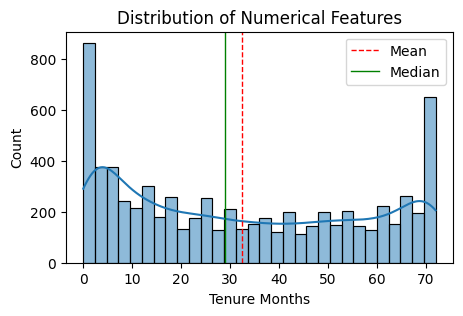

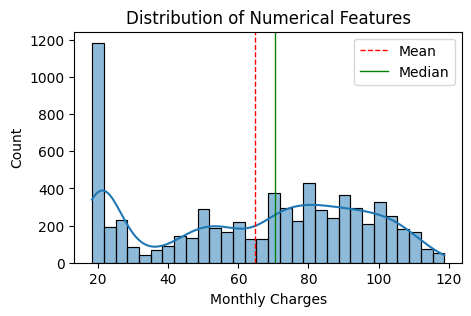

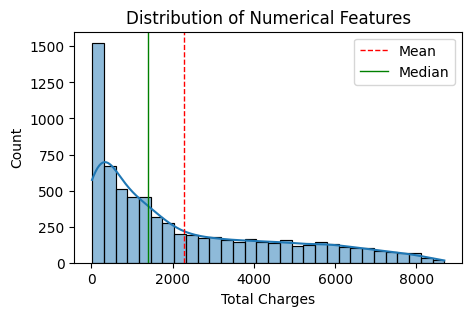

In [16]:
## Numerical features distribution across all numerical features in the dataset

def plot_histogram(df, features):
    plt.figure(figsize=(5,3))
    sns.histplot(df[features], kde=True, bins=30)
    plt.title('Distribution of Numerical Features')
    # calculate mean and median
    col_mean = df[features].mean()
    col_median = df[features].median()
    plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(col_median, color='green', linestyle='solid', linewidth=1, label='Median')
    plt.legend()
    plt.show()


plot_histogram(df, 'Tenure Months')
plot_histogram(df, 'Monthly Charges')

plot_histogram(df, 'Total Charges') 


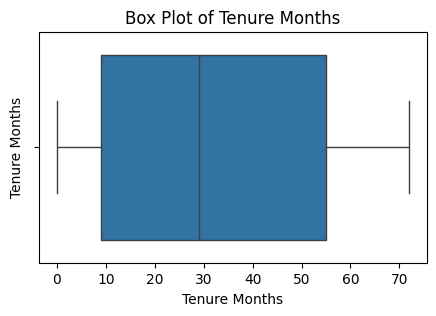

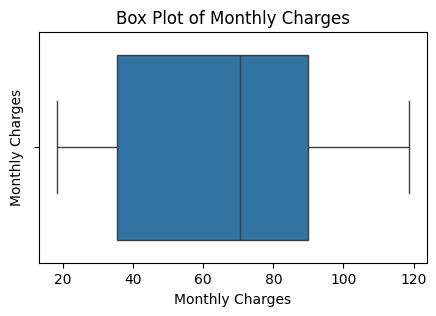

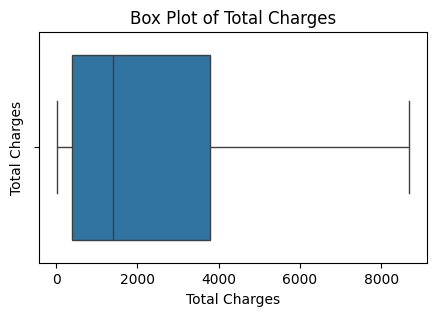

In [18]:
# BOX PLOT 

def plot_boxplot(df, features):
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[features])
    plt.title(f'Box Plot of {features}')
    plt.ylabel(features)
    plt.show()

plot_boxplot(df, 'Tenure Months')
plot_boxplot(df, 'Monthly Charges')
plot_boxplot(df, 'Total Charges')

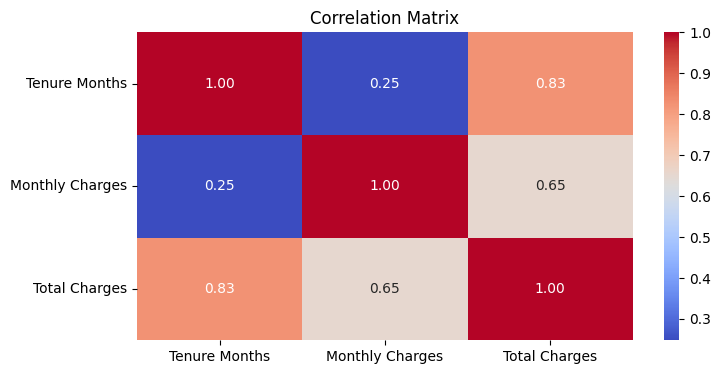

In [19]:
## Correlation Matrix 
plt.figure(figsize=(8, 4))
sns.heatmap(df[["Tenure Months","Monthly Charges","Total Charges"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Analysis on Categorical Column

In [20]:
categorical_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label']

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


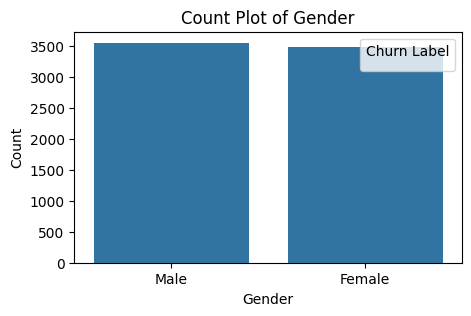

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


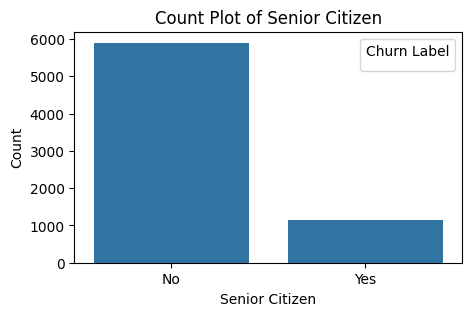

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


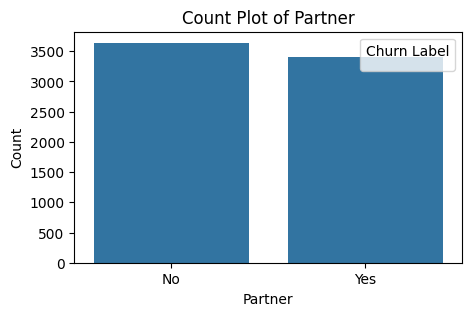

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


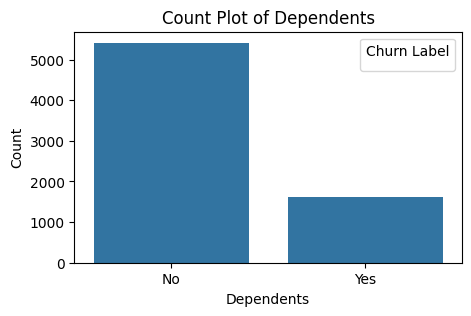

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


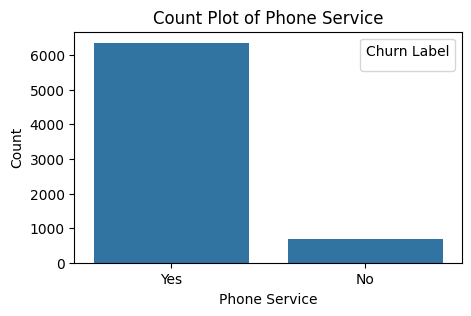

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


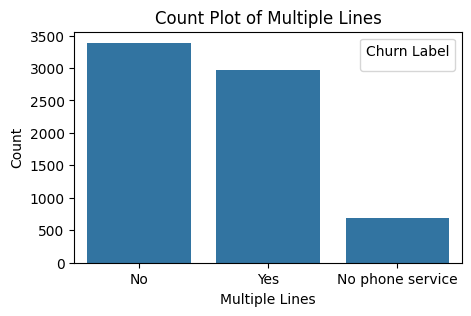

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


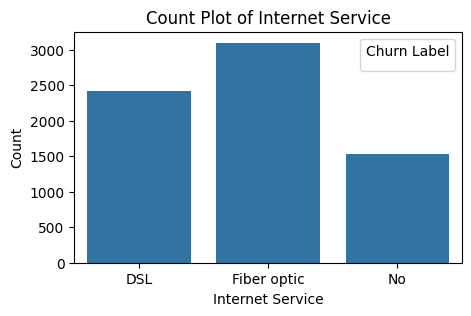

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


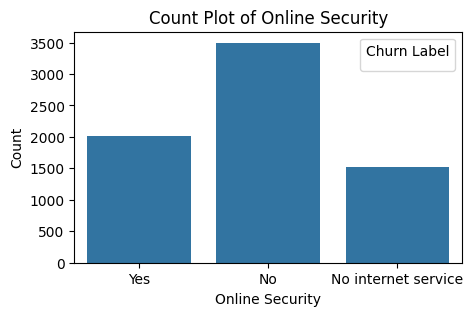

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


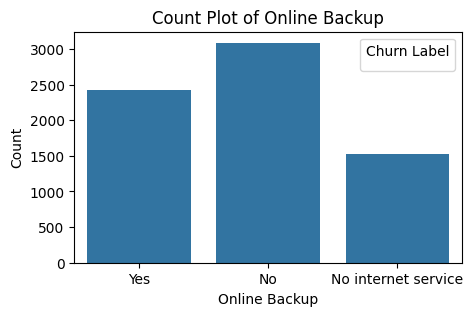

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


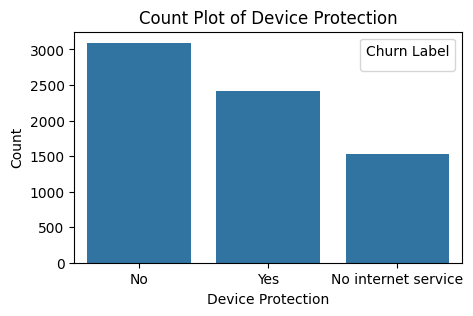

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


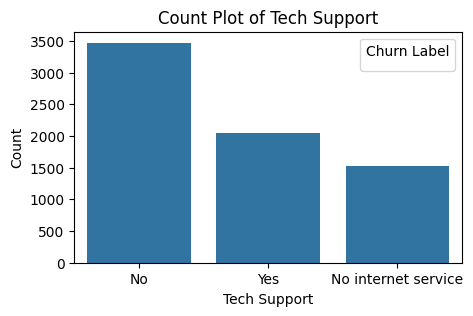

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


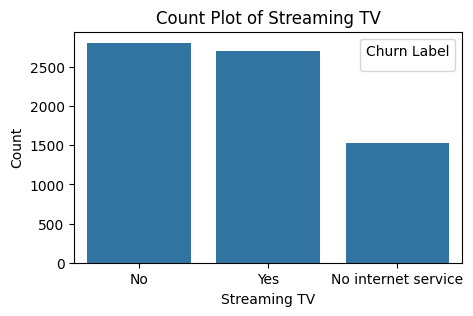

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


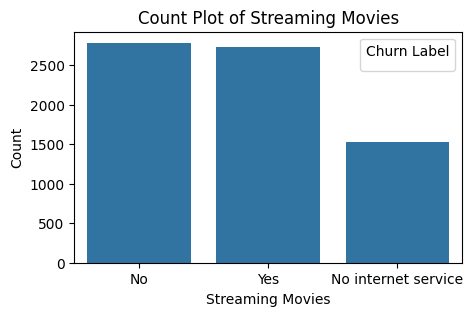

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


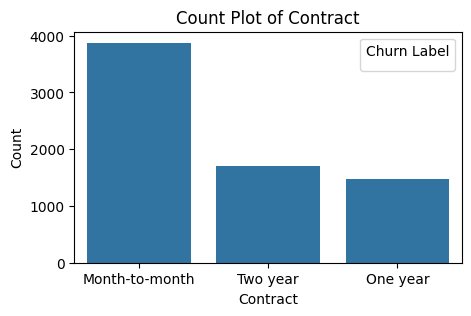

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


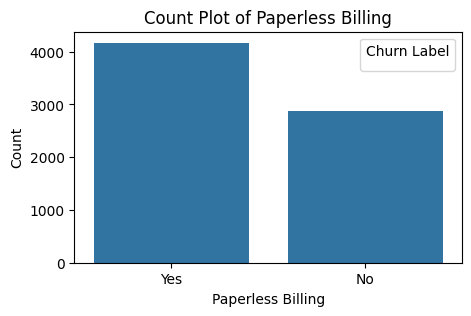

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


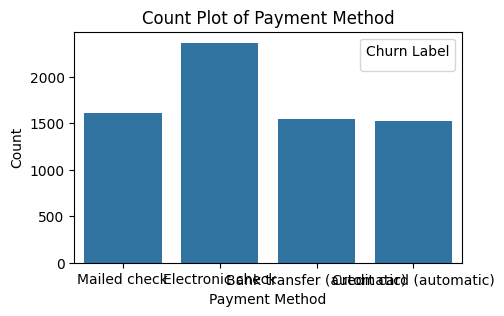

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1032567786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn Label')


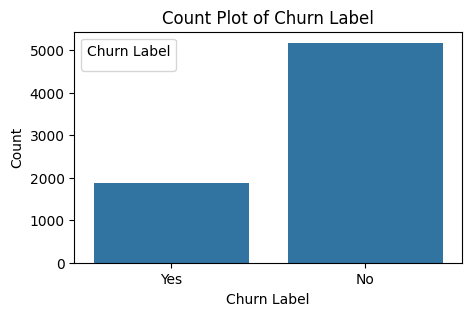

In [23]:
# Countplot for categorical features

for cat_features in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[cat_features])
    plt.title(f'Count Plot of {cat_features}')
    plt.xlabel(cat_features)
    plt.ylabel('Count')
    plt.legend(title='Churn Label')
    plt.show()

### Label Encoding of target variable

In [ ]:

df['Churn Label'] = df['Churn Label'].replace({'Yes': 1, 'No': 0})

C:\Users\shree\AppData\Local\Temp\ipykernel_15860\1059078455.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn Label'] = df['Churn Label'].replace({'Yes': 1, 'No': 0})


In [25]:
df.head(2)


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,67,2701


In [26]:
print(df['Churn Label'].value_counts())

Churn Label
0    5174
1    1869
Name: count, dtype: int64


#### Label Encoding of categorical column

In [27]:
# identifying the categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Categorical Features:', categorical_features)

Categorical Features: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [29]:
encoder = {}

for columns in categorical_features:
    label_encoder = LabelEncoder()
    df[columns] = label_encoder.fit_transform(df[columns])
    encoder[columns] = label_encoder

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [30]:
encoder

{'Gender': LabelEncoder(),
 'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder()}

In [31]:
df.head(2)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,1,86,3239
1,0,0,0,1,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,1,67,2701
